In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
item_cat=pd.read_csv("item_categories.csv")
item=pd.read_csv("items.csv")
sales = pd.read_csv("sales_train.csv.gz")
# sub=pd.read_csv("sample_submission.csv.gz")
shops=pd.read_csv("shops.csv")
test=pd.read_csv("test.csv.gz")

In [53]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [54]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


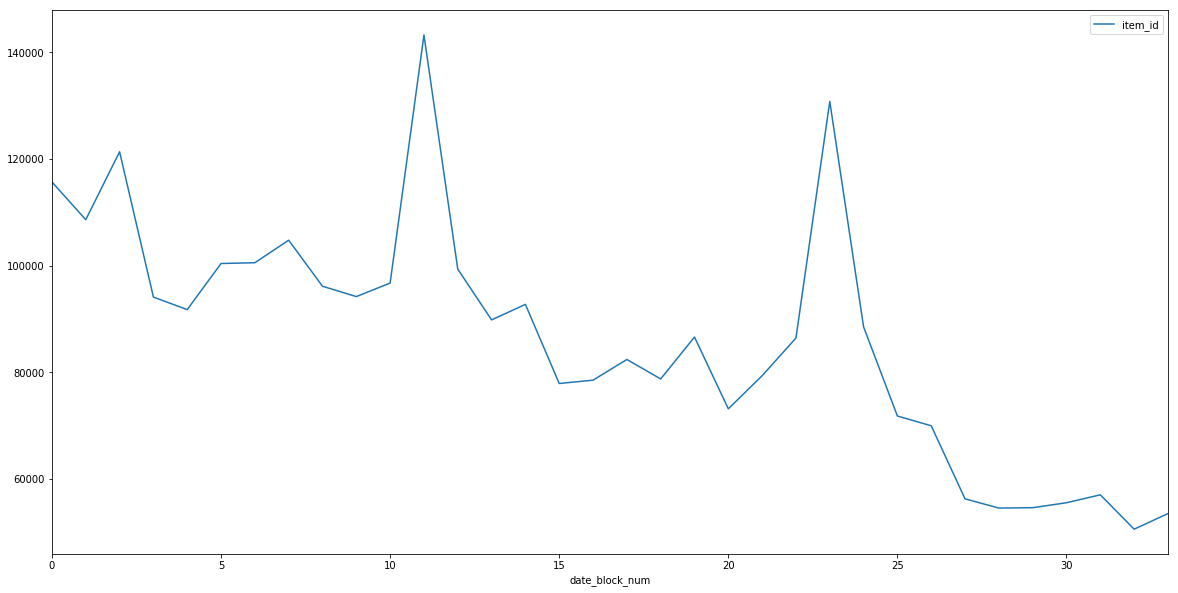

In [55]:
# 월별 item 판매 수
df = pd.DataFrame(sales.groupby(['date_block_num'])['item_id'].count())
df.plot(figsize=(20,10))
### 11과 23에 이상값을 보임 --> 11은 13년도 말, 12또한 14년도 말

In [56]:
sales[sales['date_block_num']==11].head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1124316,04.12.2013,11,25,17769,199.0,1.0
1124317,15.12.2013,11,25,18016,500.0,1.0
1124318,22.12.2013,11,25,17763,399.0,1.0
1124319,31.12.2013,11,25,17760,3250.0,1.0
1124320,18.12.2013,11,25,17763,398.5,1.0


In [57]:
sales[sales['date_block_num']==23].head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2192637,24.12.2014,23,42,17279,299.0,1.0
2192638,27.12.2014,23,42,17315,399.0,1.0
2192639,24.12.2014,23,42,17315,399.0,1.0
2192640,21.12.2014,23,42,17315,399.0,1.0
2192641,20.12.2014,23,42,17315,399.0,2.0


In [58]:
# sales[sales['date_block_num']==10].head()

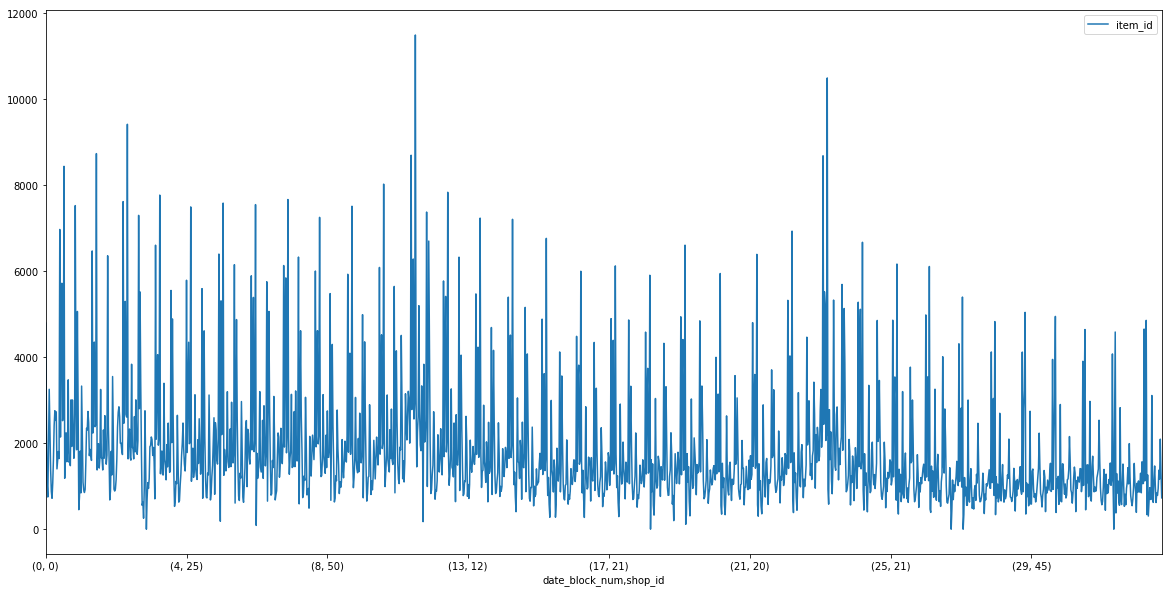

In [59]:
# 월별 shop_id 판매 수
df = pd.DataFrame(sales.groupby(['date_block_num','shop_id'])['item_id'].count())
df.plot(figsize=(20,10))

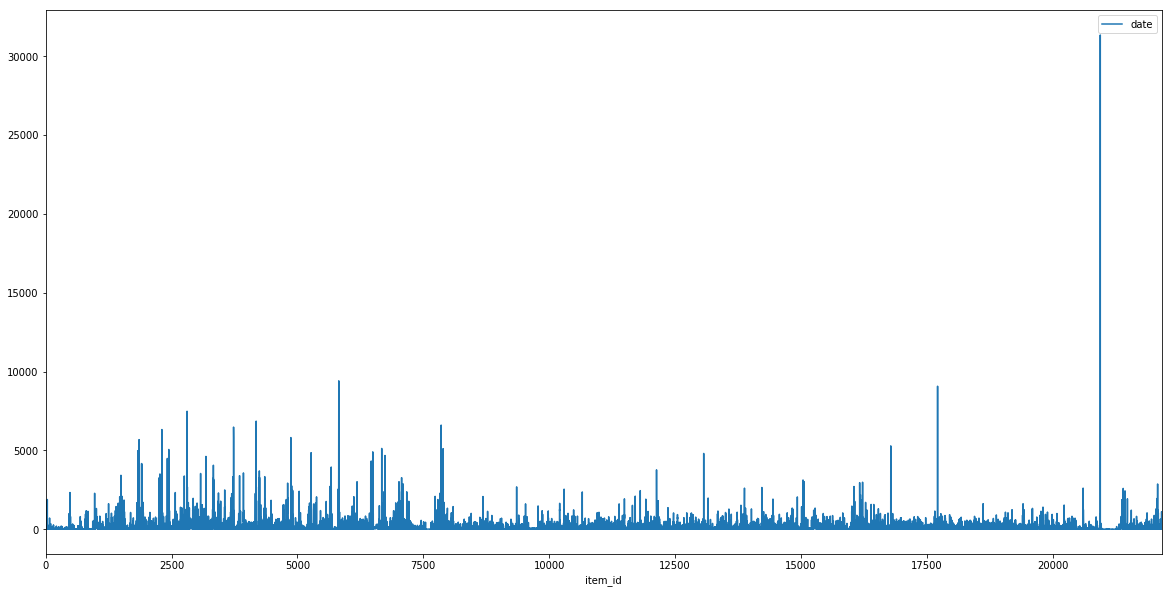

In [60]:
# 3년간 item_id 판매 수
df = pd.DataFrame(sales.groupby(['item_id'])['date'].count())
df.plot(figsize=(20,10))

In [61]:
pd.DataFrame(sales.groupby(['item_id'])['date'].count()).sort_values(by=['date'], ascending=False)[:5]

,date
item_id,
20949,31340
5822,9408
17717,9067
2808,7479
4181,6853


In [62]:
item[item['item_id']==20949]
# Company T-shirt packs are white (34*42)

,item_name,item_id,item_category_id
20949,Фирменный пакет майка 1С Интерес белый (34*42)...,20949,71


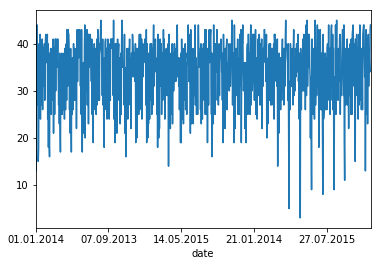

In [63]:
df = sales[sales['item_id'] == 20949].groupby(['date'])['date_block_num'].count()
df.plot()

In [64]:
sales_all = sales.drop(columns=['date_block_num', 'date', 'item_price'])
x_train = sales_all
y_train = x_train.pop('item_cnt_day')

In [65]:
sales_all.head()

,shop_id,item_id
0,59,22154
1,25,2552
2,25,2552
3,25,2554
4,25,2555


In [66]:
x_train = x_train.as_matrix()
y_train = y_train.as_matrix()
test_id_idx = test.pop('ID')
x_test = test.as_matrix()

C:\Users\woon\Miniconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\woon\Miniconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\woon\Miniconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [67]:
x_train.shape, y_train.shape, x_test.shape

((2935849, 2), (2935849,), (214200, 2))

In [68]:
# x_train = sales_month
# y_train = x_train.pop('item_cnt_day')

In [69]:
# from keras.models import Sequential
# from keras.layers import Dense,Dropout
# from keras.layers import LSTM
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_squared_error

In [70]:
# model = Sequential()
# model.add(Dense(8, input_dim=2, activation='relu'))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer='adam')
# model.fit(x_train, y_train, epochs=200, batch_size=2, verbose=2)

### Build Model

In [71]:
from sklearn import linear_model

In [72]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [75]:
# Make predictions using the testing set
submit = pd.DataFrame({'ID': test_id_idx, 'item_cnt_month': regr.predict(x_test)})
submit

,ID,item_cnt_month
0,0,1.232571
1,1,1.234542
2,2,1.233936
3,3,1.233929
4,4,1.234180
5,5,1.232585
6,6,1.232599
7,7,1.232634
8,8,1.234535
9,9,1.232334


In [74]:
submit.to_csv('submission_all_day.csv', index=False)
# 제출값 1.55635